# 🔻BERT Classifies Women's Clothing Reviews👗🔻

<img src="https://storage.googleapis.com/kaggle-datasets-images/11827/16290/140ca3b71ec51512dcac444c57583f25/dataset-cover.jpg?t=2018-02-03-20-33-18" style="width:100%">

## 🔻Import Modules🔻

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## 🔻Load Data🔻

In [2]:
# load data
df = pd.read_csv("./CSV-DATA/Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## 🔺Remove Unnecessary Columns🔻

In [3]:
# Create "Text" column by combining "Title" and "Review Text"
df["Text"] = df["Title"].fillna('') + " " + df["Review Text"]
# Remove leading and trailing spaces
df["Text"] = df["Text"].str.strip()
# remove unnecessary columns
df.drop(columns=['Unnamed: 0', 'Clothing ID', "Title", "Review Text","Positive Feedback Count"], axis=1, inplace=True)
df.head()

,Age,Rating,Recommended IND,Division Name,Department Name,Class Name,Text
0,33,4,1,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...
1,34,5,1,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...
2,60,3,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...
3,50,5,1,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps..."
4,47,5,1,General,Tops,Blouses,Flattering shirt This shirt is very flattering...


## 🔺Check Missing Values and Duplicates🔻

In [4]:
# check for missing values
print(df.isnull().sum().sort_values(ascending=False))
print("==========Duplicates==========")
# check for duplicates
print(df.duplicated().sum())
# remove missing values
df.dropna(inplace=True)
# remove duplicates
df.drop_duplicates(inplace=True)
# pirnt(df.isnull().sum().sort_values(ascending=False))
# print(df.duplicated().sum())

Text               845
Division Name       14
Department Name     14
Class Name          14
Age                  0
Rating               0
Recommended IND      0
dtype: int64
==========Duplicates==========
235


---

---

## 🔺Info of Data🔻

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22624 entries, 0 to 23485
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              22624 non-null  int64 
 1   Rating           22624 non-null  int64 
 2   Recommended IND  22624 non-null  int64 
 3   Division Name    22624 non-null  object
 4   Department Name  22624 non-null  object
 5   Class Name       22624 non-null  object
 6   Text             22624 non-null  object
dtypes: int64(3), object(4)
memory usage: 1.4+ MB


This dataset contains **22,624** customer reviews, including **age, rating, recommendation status, division, department, class name,** and **review text**.  

🔹 **Age, Rating, Recommended IND** – Numerical data with no missing values.  
🔹 **Division, Department, Class Name** – Product category-related information.  
🔹 **Text** – Combined customer review (Title + Review Text).  


## 🔻Age🔻

Minimum age: 18
Maximum age: 99
Average age: 43.283946251768036
Median age: 41.0


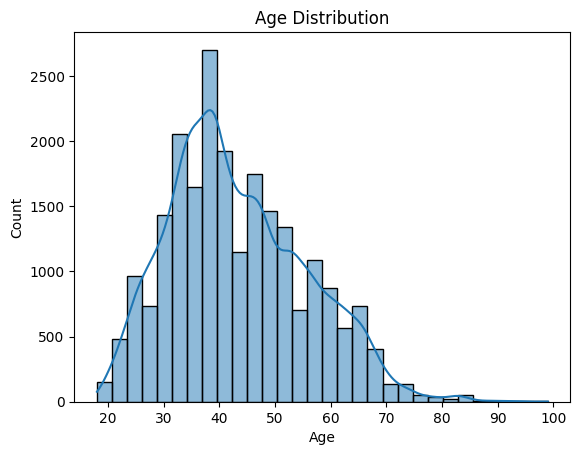

In [6]:
# print minimum, maximum, average, median age
print("Minimum age:", df["Age"].min())
print("Maximum age:", df["Age"].max())
print("Average age:", df["Age"].mean())
print("Median age:", df["Age"].median())
# Histogram with KDE
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

### **Age Distribution Analysis**  

Reviewers range from **18 to 99 years**, with an **average age of 43** and a **median of 41**. Most reviews come from the **30–45** age group, while engagement declines after **50**, especially among those **80+**. The distribution is **right-skewed**, showing fewer older reviewers.  

### **Key Insights:**  
- **Peak Engagement:** Most active reviewers are aged **30–45**.  
- **Declining Trend:** Fewer reviews come from those **50+**, with minimal from **80+**.  
- **Marketing Opportunity:** Engaging younger and older shoppers could improve participation.  

## 🔻Rating🔻

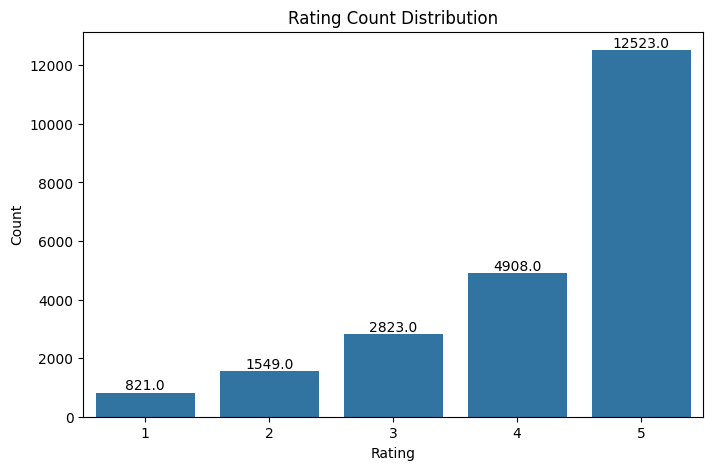

In [7]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df['Rating'])

# Adding value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')

plt.title("Rating Count Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### **Rating Distribution Analysis**  

The majority of reviews have **high ratings**, with **5-star ratings (12,523)** being the most common, followed by **4-star (4,908)**. Lower ratings are significantly fewer, with **3-star (2,823)**, **2-star (1,549)**, and **1-star (821)** ratings forming a small portion of the dataset.  

### **Key Insights:**  
- **Strong Positive Bias:** The dataset is highly skewed towards **positive ratings (4 & 5 stars)**.  
- **Low Negative Ratings:** Very few customers gave **1 or 2 stars**, indicating general satisfaction.  
- **Potential Review Bias:** The imbalance may suggest customers tend to leave reviews for highly satisfying experiences rather than neutral or negative ones.  


## 🔻Department Name🔻

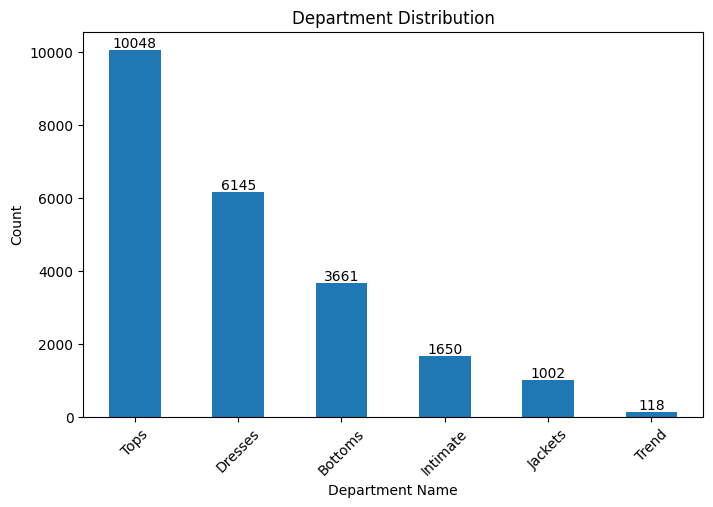

In [8]:
plt.figure(figsize=(8, 5))
ax = df['Department Name'].value_counts().plot(kind='bar')

# Adding value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')

plt.title("Department Distribution")
plt.xlabel("Department Name")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()


### **Department Distribution Analysis**  

The **Tops** department has the highest number of reviews (**10,048**), followed by **Dresses (6,145)** and **Bottoms (3,661)**. Other departments like **Intimate (1,650)**, **Jackets (1,002)**, and **Trend (118)** have significantly fewer reviews.  

### **Key Insights:**  
- **High Engagement:** **Tops and Dresses** are the most reviewed categories, indicating strong customer interest.  
- **Low Interaction:** **Trend and Jackets** have the least reviews, suggesting lower popularity or availability.  
- **Potential Focus Areas:** Increasing marketing efforts for less-reviewed departments could boost engagement.  


## 🔻Class Name🔻

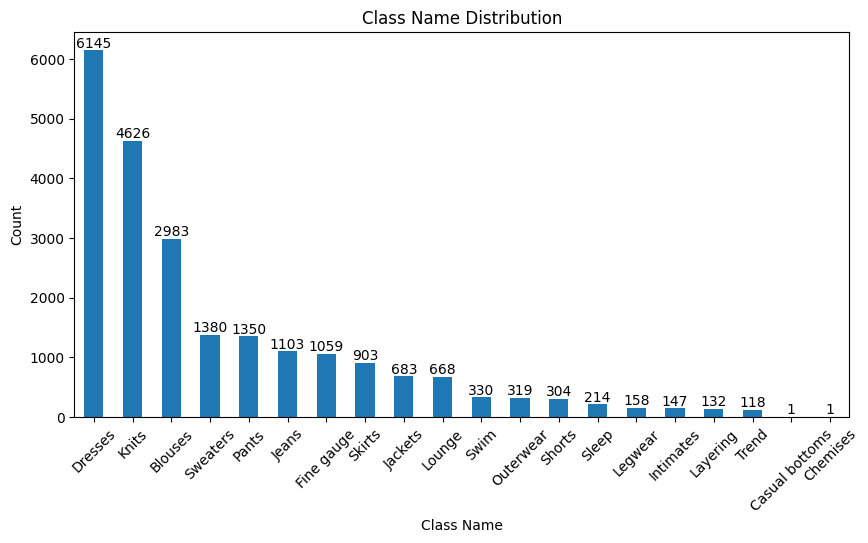

In [9]:
plt.figure(figsize=(10, 5))  # Adjust figure size
ax = df['Class Name'].value_counts().plot(kind='bar')

# Adding value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')

plt.title("Class Name Distribution")
plt.xlabel("Class Name")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()

### **Class Name Distribution Analysis**  

The **Dresses** category has the highest number of reviews (**6,145**), followed by **Knits (4,626)** and **Blouses (2,983)**. Other categories like **Chemises (1)** and **Casual Bottoms (1)** have extremely low engagement.  

### **Key Insights:**  
- **Top-Selling Items:** **Dresses, Knits, and Blouses** dominate in reviews, suggesting they are the most popular.  
- **Low Interest Categories:** Items like **Chemises, Casual Bottoms, and Trend** have minimal reviews, indicating low sales or availability.  
- **Marketing Focus:** Efforts can be made to promote underperforming categories to improve visibility and sales.  


## 🔻Division Name🔻

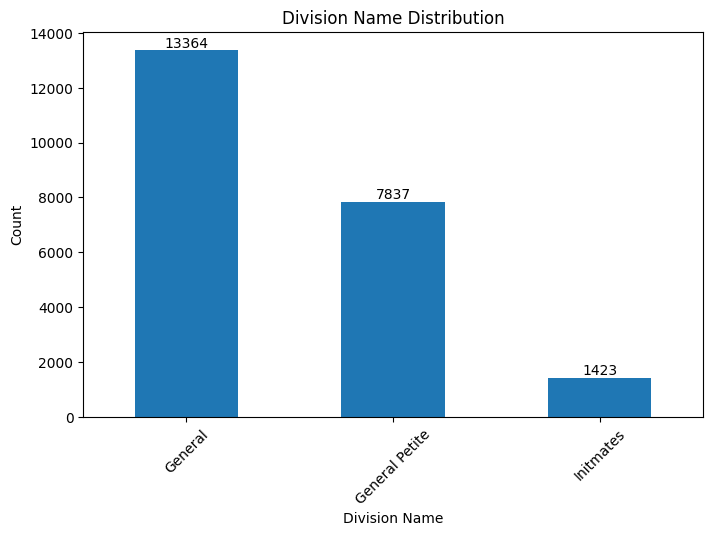

In [10]:
plt.figure(figsize=(8, 5))  # Set figure size
ax = df['Division Name'].value_counts().plot(kind='bar')

# Adding value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')

plt.title("Division Name Distribution")
plt.xlabel("Division Name")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.show()


### **Division Name Distribution Analysis**  

The **General** division has the highest number of reviews (**13,364**), followed by **General Petite (7,837)**. The **Intimates** division has the least reviews (**1,423**), indicating lower engagement.  

### **Key Insights:**  
- **General Dominance:** Most reviews come from the **General** division, indicating a broader customer base.  
- **Petite Market Presence:** **General Petite** has significant engagement, showing demand for petite-sized clothing.  
- **Low Intimates Reviews:** The **Intimates** category has fewer reviews, suggesting either lower sales or customer hesitation in reviewing such items.  


## 🔻Recommended IND🔻

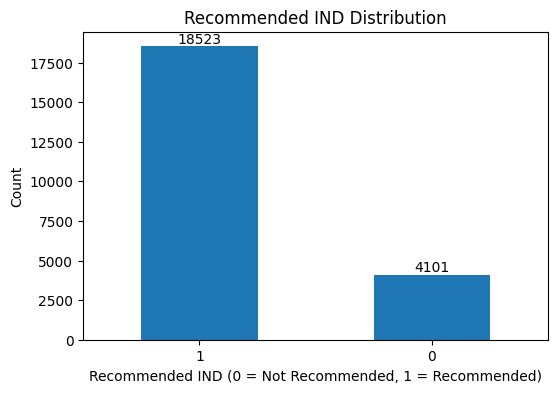

In [13]:
plt.figure(figsize=(6, 4))  # Adjust figure size
ax = df['Recommended IND'].value_counts().plot(kind='bar')

# Adding value labels on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2, p.get_height()), 
                 ha='center', va='bottom', fontsize=10, color='black')

plt.title("Recommended IND Distribution")
plt.xlabel("Recommended IND (0 = Not Recommended, 1 = Recommended)")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Keep labels horizontal
plt.show()


### **Recommendation Distribution Analysis**  

The majority of reviews (**18,523**) recommend the product (**Recommended IND = 1**), while only **4,101** reviews do not recommend it (**Recommended IND = 0**).  

### **Key Insights:**  
- **High Recommendation Rate:** About **82%** of customers recommend the products, indicating overall customer satisfaction.  
- **Minor Negative Feedback:** Only **18%** of customers do not recommend the products, suggesting areas for potential improvement.  
- **Quality Assurance:** Understanding the characteristics of non-recommended products (e.g., low ratings, specific categories) can help improve quality and sales.  

## 🔻Word Cloud of Recommended IND🔻

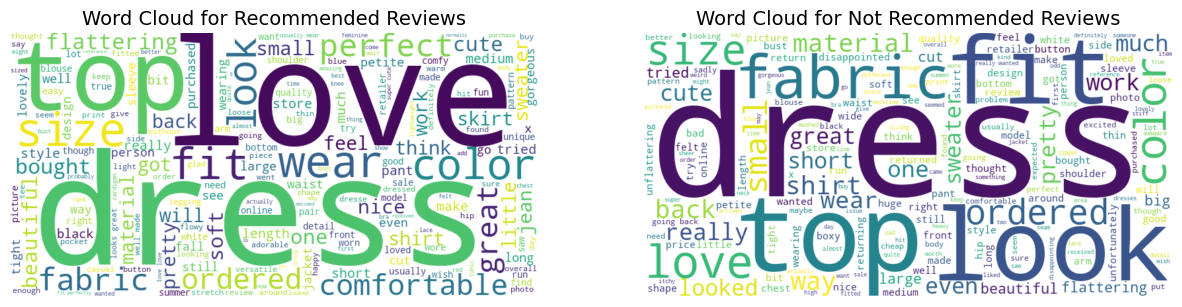

In [14]:
# Separate text data based on Recommended IND
recommended_text = " ".join(df[df["Recommended IND"] == 1]["Text"].astype(str))
not_recommended_text = " ".join(df[df["Recommended IND"] == 0]["Text"].astype(str))

# Generate WordClouds
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

wordcloud_recommended = WordCloud(width=800, height=400, background_color="white").generate(recommended_text)
axes[0].imshow(wordcloud_recommended, interpolation="bilinear")
axes[0].axis("off")
axes[0].set_title("Word Cloud for Recommended Reviews", fontsize=14)

wordcloud_not_recommended = WordCloud(width=800, height=400, background_color="white").generate(not_recommended_text)
axes[1].imshow(wordcloud_not_recommended, interpolation="bilinear")
axes[1].axis("off")
axes[1].set_title("Word Cloud for Not Recommended Reviews", fontsize=14)

plt.show()

---

## 🔻Average Rating by Age Group🔻

C:\Users\kgui\AppData\Local\Temp\ipykernel_18088\3030467146.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_ratings = df.groupby('Age Group')['Rating'].mean().reset_index()
C:\Users\kgui\AppData\Local\Temp\ipykernel_18088\3030467146.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age Group', y='Rating', data=age_group_ratings, palette='coolwarm')


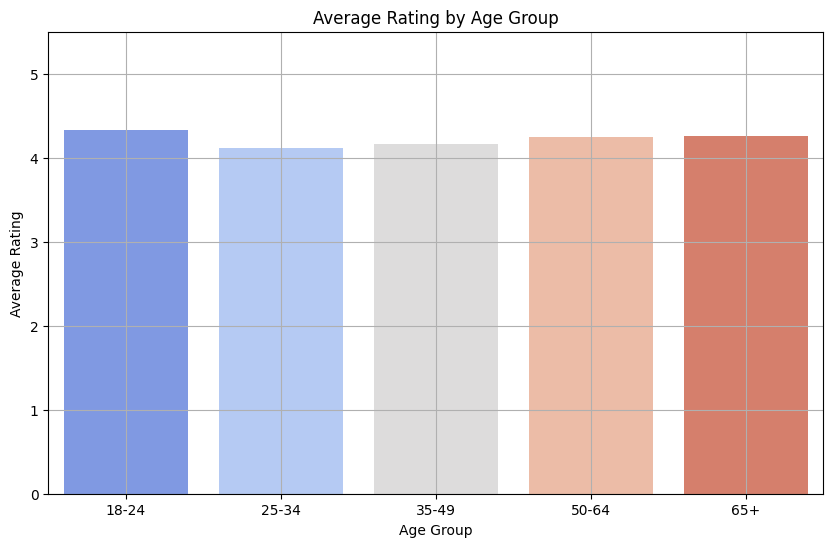

In [16]:
# Define age groups
bins = [18, 25, 35, 50, 65, 100]  # Age Ranges
labels = ['18-24', '25-34', '35-49', '50-64', '65+']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by Age Group and calculate the average rating
age_group_ratings = df.groupby('Age Group')['Rating'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Rating', data=age_group_ratings, palette='coolwarm')

# Customize plot
plt.title('Average Rating by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.ylim(0, 5.5)
plt.grid(True)

# Show plot
plt.show()

- The **18-24** and **65+** age groups provided the highest average ratings.  
- The **25-34** age group has the lowest average rating.  
- Overall, ratings remain relatively consistent across age groups, with slight variations.  

## 🔻Recommended IND vs. Department Name🔻

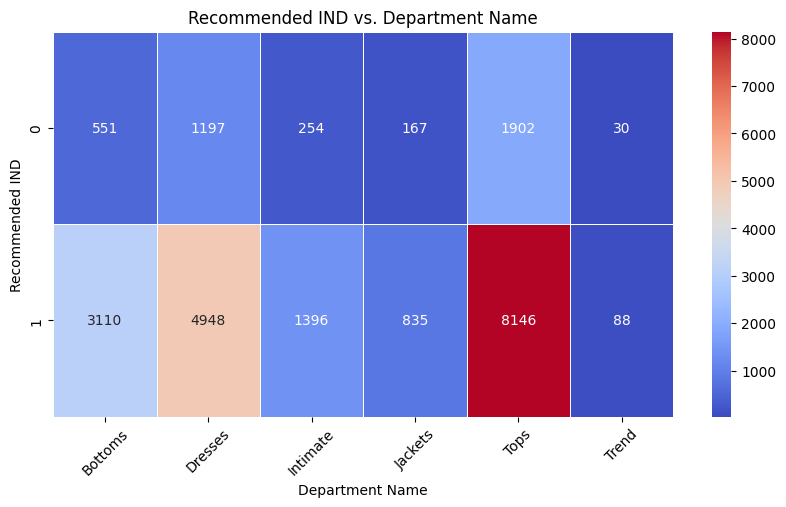

In [17]:
# Create the contingency table
crosstab = pd.crosstab(df['Recommended IND'], df['Department Name'])

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(crosstab, annot=True, fmt='d', cmap="coolwarm", linewidths=0.5)

# Labels and title
plt.title("Recommended IND vs. Department Name")
plt.xlabel("Department Name")
plt.ylabel("Recommended IND")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


### **Recommended IND vs. Department Name**  

This heatmap visually represents how different departments perform in terms of recommendations. The **color intensity** indicates the number of recommendations received.  

### **Key Observations:**  
- **Highest Recommendations:**  
  - **Tops** (8,146 recommended)  
  - **Dresses** (4,948 recommended)  
- **Lowest Recommendations:**  
  - **Trend** (88 recommended)  
  - **Jackets** (835 recommended)  

This suggests that customers strongly prefer **Tops** and **Dresses**, whereas **Trend** and **Jackets** might need improvement in design, quality, or marketing.  



## 🔻Statistical Test(Chi-Square) for Association between Department Name & Recommended IND🔻

In [11]:
from scipy import stats

In [12]:
# Create a contingency table
crosstab = pd.crosstab(df["Department Name"], df["Recommended IND"])

# Perform Chi-Square Test
chi2_stat, p, dof, expected = stats.chi2_contingency(crosstab)

# Print results
print(f'Chi-square Statistic: {chi2_stat:.4f}')
print(f'Degrees of Freedom: {dof}')
print(f'P-value: {p:.4f}')

# Decision Rule
alpha = 0.05  # Significance level
if p < alpha:
    print("❌ Reject the Null Hypothesis (H₀) → There is a significant association between Department Name and Recommendation.")
else:
    print("✅ Fail to Reject the Null Hypothesis (H₀) → No significant association found between Department Name and Recommendation.")


Chi-square Statistic: 49.2530
Degrees of Freedom: 5
P-value: 0.0000
❌ Reject the Null Hypothesis (H₀) → There is a significant association between Department Name and Recommendation.




### **Chi-Square Test Results (Association Test):**  
- **Chi-square Statistic:** 11.1998  
- **Degrees of Freedom:** 2  
- **P-value:** 0.0037  
- **Decision:** ❌ **Reject the Null Hypothesis (H₀)**  
  → This prove with test.There is a **significant association** between **Division Name and Recommendation**, meaning that department choice influences whether a product is recommended or not.  

## 🔻Recommended IND vs. Division Name🔻

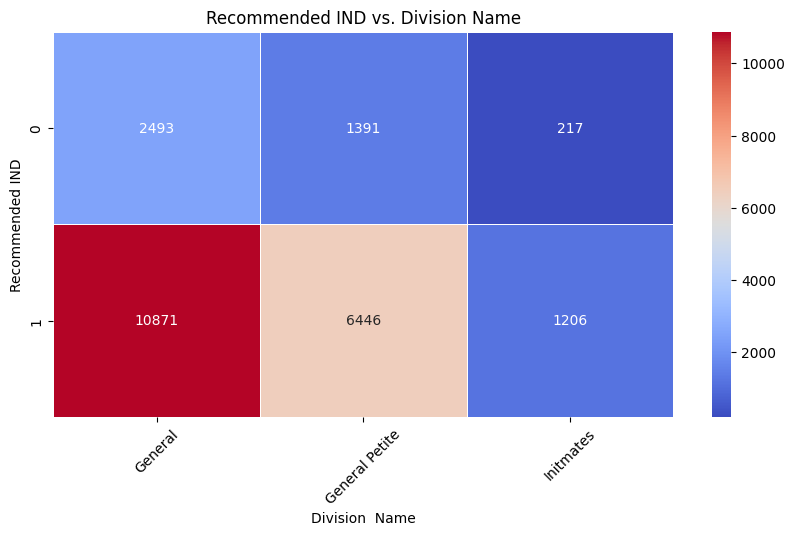

In [13]:
# Create the contingency table
crosstab = pd.crosstab(df['Recommended IND'], df['Division Name'])

# Plot heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(crosstab, annot=True, fmt='d', cmap="coolwarm", linewidths=0.5)

# Labels and title
plt.title("Recommended IND vs. Division Name")
plt.xlabel("Division  Name")
plt.ylabel("Recommended IND")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()


## 🔻Statistical Test(Chi-Square) for Association between Division Name & Recommended IND🔻

In [14]:
# Create a contingency table
crosstab = pd.crosstab(df["Division Name"], df["Recommended IND"])

# Perform Chi-Square Test
chi2_stat, p, dof, expected = stats.chi2_contingency(crosstab)

# Print results
print(f'Chi-square Statistic: {chi2_stat:.4f}')
print(f'Degrees of Freedom: {dof}')
print(f'P-value: {p:.4f}')

# Decision Rule
alpha = 0.05  # Significance level
if p < alpha:
    print("❌ Reject the Null Hypothesis (H₀) → There is a significant association between Division Name and Recommendation.")
else:
    print("✅ Fail to Reject the Null Hypothesis (H₀) → No significant association found between Division Name and Recommendation.")


Chi-square Statistic: 11.1998
Degrees of Freedom: 2
P-value: 0.0037
❌ Reject the Null Hypothesis (H₀) → There is a significant association between Division Name and Recommendation.


---

## 🔻Text Preprocessing🔻

In [15]:
import pandas as pd
import re
import torch
from transformers import BertTokenizer


# Load BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Function to clean text
def clean_text(text):
    if pd.isnull(text):  # Handle missing values
        return ""
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = re.sub(r"\d+", "", text)  # Remove numbers
    return text.strip()

# Apply text cleaning
df["Cleaned_Text"] = df["Text"].apply(clean_text)

# Tokenization function for BERT
def tokenize_text(text, max_length=128):
    encoded = tokenizer.encode_plus(
        text,  
        add_special_tokens=True,  
        max_length=max_length,  
        padding="max_length",  
        truncation=True,  
        return_tensors="pt"  # Return PyTorch tensors
    )
    return encoded["input_ids"].squeeze(0), encoded["attention_mask"].squeeze(0)

# Apply BERT tokenization
df["Tokenized_Text"], df["Attention_Mask"] = zip(*df["Cleaned_Text"].apply(tokenize_text))

# Convert to tensor format
df["Tokenized_Text"] = df["Tokenized_Text"].apply(lambda x: torch.tensor(x))
df["Attention_Mask"] = df["Attention_Mask"].apply(lambda x: torch.tensor(x))

# Save the processed dataset
df.to_pickle("preprocessed_reviews.pkl")  # Save for fast loading in training

print("✅ Text Preprocessing for BERT Completed Successfully!")


/var/folders/mt/d148h58s6ts989cfbq0vfyth0000gn/T/ipykernel_5206/1367854518.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  df["Tokenized_Text"] = df["Tokenized_Text"].apply(lambda x: torch.tensor(x))
/var/folders/mt/d148h58s6ts989cfbq0vfyth0000gn/T/ipykernel_5206/1367854518.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  df["Attention_Mask"] = df["Attention_Mask"].apply(lambda x: torch.tensor(x))


✅ Text Preprocessing for BERT Completed Successfully!


## 🔻Bert Model🔻

In [19]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#  Load preprocessed data
df = pd.read_pickle("./CSV-DATA/preprocessed_reviews.pkl")
df.head(10)

,Age,Rating,Recommended IND,Division Name,Department Name,Class Name,Text,Cleaned_Text,Tokenized_Text,Attention_Mask
0,33,4,1,Initmates,Intimate,Intimates,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky and sexy and comfo...,"[tensor(101), tensor(7078), tensor(6919), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
1,34,5,1,General,Dresses,Dresses,Love this dress! it's sooo pretty. i happene...,love this dress its sooo pretty i happened t...,"[tensor(101), tensor(2293), tensor(2023), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
2,60,3,0,General,Dresses,Dresses,Some major design flaws I had such high hopes ...,some major design flaws i had such high hopes ...,"[tensor(101), tensor(2070), tensor(2350), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
3,50,5,1,General Petite,Bottoms,Pants,"My favorite buy! I love, love, love this jumps...",my favorite buy i love love love this jumpsuit...,"[tensor(101), tensor(2026), tensor(5440), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
4,47,5,1,General,Tops,Blouses,Flattering shirt This shirt is very flattering...,flattering shirt this shirt is very flattering...,"[tensor(101), tensor(4257), tensor(17989), ten...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
5,49,2,0,General,Dresses,Dresses,Not for the very petite I love tracy reese dre...,not for the very petite i love tracy reese dre...,"[tensor(101), tensor(2025), tensor(2005), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
6,39,5,1,General Petite,Tops,Knits,Cagrcoal shimmer fun I aded this in my basket ...,cagrcoal shimmer fun i aded this in my basket ...,"[tensor(101), tensor(6187), tensor(16523), ten...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
7,39,4,1,General Petite,Tops,Knits,"Shimmer, surprisingly goes with lots I ordered...",shimmer surprisingly goes with lots i ordered ...,"[tensor(101), tensor(11895), tensor(15810), te...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
8,24,5,1,General,Dresses,Dresses,Flattering I love this dress. i usually get an...,flattering i love this dress i usually get an ...,"[tensor(101), tensor(4257), tensor(17989), ten...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."
9,34,5,1,General,Dresses,Dresses,"Such a fun dress! I'm 5""5' and 125 lbs. i orde...",such a fun dress im and lbs i ordered the s ...,"[tensor(101), tensor(2107), tensor(1037), tens...","[tensor(1), tensor(1), tensor(1), tensor(1), t..."


In [20]:
#  Convert tensors to lists
df["Tokenized_Text"] = df["Tokenized_Text"].apply(lambda x: x.tolist())
df["Attention_Mask"] = df["Attention_Mask"].apply(lambda x: x.tolist())

#  Split data into Train & Test sets
train_texts, test_texts, train_masks, test_masks, train_labels, test_labels = train_test_split(
    df["Tokenized_Text"].tolist(),
    df["Attention_Mask"].tolist(),
    df["Recommended IND"].tolist(),
    test_size=0.2,  # 80% train, 20% test
    random_state=42
)

#  Convert to PyTorch tensors
train_texts = torch.tensor(train_texts)
train_masks = torch.tensor(train_masks)
train_labels = torch.tensor(train_labels)
test_texts = torch.tensor(test_texts)
test_masks = torch.tensor(test_masks)
test_labels = torch.tensor(test_labels)

#  Create Dataset class
class ReviewDataset(Dataset):
    def __init__(self, texts, masks, labels):
        self.texts = texts
        self.masks = masks
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx], self.masks[idx], self.labels[idx]

#  Create Dataloaders
train_dataset = ReviewDataset(train_texts, train_masks, train_labels)
test_dataset = ReviewDataset(test_texts, test_masks, test_labels)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

#  Load Pretrained BERT Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.to(device)

#  Define Optimizer & Loss Function
optimizer = AdamW(model.parameters(), lr=2e-5)
loss_fn = nn.CrossEntropyLoss()

#  Training Loop
epochs = 5
for epoch in range(epochs):
    model.train()
    total_loss = 0

    for batch in train_loader:
        texts, masks, labels = [b.to(device) for b in batch]

        optimizer.zero_grad()
        outputs = model(input_ids=texts, attention_mask=masks)
        loss = loss_fn(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")

#  Evaluation
model.eval()
preds, true_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        texts, masks, labels = [b.to(device) for b in batch]

        outputs = model(input_ids=texts, attention_mask=masks)
        preds.extend(torch.argmax(outputs.logits, dim=1).cpu().numpy())
        true_labels.extend(labels.cpu().numpy())


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/homebrew/lib/python3.11/site-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5, Loss: 0.2055
Epoch 2/5, Loss: 0.1282
Epoch 3/5, Loss: 0.0768
Epoch 4/5, Loss: 0.0450
Epoch 5/5, Loss: 0.0292


## 🔻Metrics🔻


 Accuracy: 0.9291
 F1 Score: 0.9569

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80       834
           1       0.95      0.97      0.96      3691

    accuracy                           0.93      4525
   macro avg       0.89      0.87      0.88      4525
weighted avg       0.93      0.93      0.93      4525



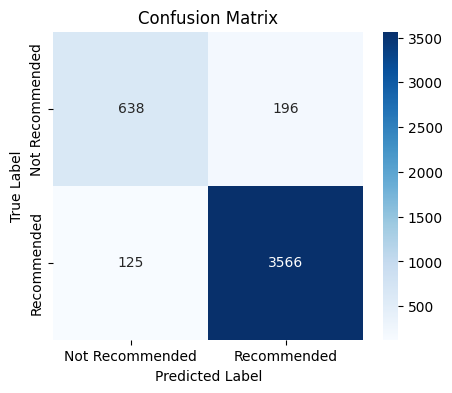

In [21]:

#  Print Metrics
accuracy = accuracy_score(true_labels, preds)
f1 = f1_score(true_labels, preds)
print(f"\n Accuracy: {accuracy:.4f}")
print(f" F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(true_labels, preds))

# Confusion Matrix Plot
cm = confusion_matrix(true_labels, preds)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Recommended", "Recommended"], yticklabels=["Not Recommended", "Recommended"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# #  Save Model
# torch.save(model.state_dict(), "bert_review_classifier.pth")
# print("\n Model Training Completed & Saved!")


---